**Loading the Libraries and Dataset**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import OneClassSVM
from sklearn.preprocessing import MinMaxScaler

***1. Load  the Dataset into Python Environment***

In [2]:
df = pd.read_csv("titanic_dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


***2. Make ‘PassengerId’ as the index column***

In [3]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df1 = df.set_index("PassengerId")
df1

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


***3. Check the basic details of the dataset***

In [5]:
df1.shape

(891, 11)

In [6]:
df1.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [8]:
df1.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

**There are 3 columns which have null values. They are :Age,Cabin & Embarked**



In [9]:
df1.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**The Youngest Passenger was 4 months old  and  the oldest was 80 years old**

**The price of ticket varies in the range of 0 to 512.32**

In [10]:
df1.duplicated().value_counts()

False    891
dtype: int64

No Duplicate Values

In [11]:
df1["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

Out of the 891 passengers 577 were Males and 314 were Females.


0    549
1    342
Name: Survived, dtype: int64


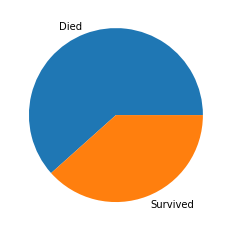

In [12]:
SV = df1["Survived"].value_counts()
print(f"\n{SV}")
plt.pie(df1["Survived"].value_counts(),labels=["Died","Survived"]);

From this we can infer that :-
549 passengers didnot Survived,
342 passengers Survived.

***4. Filling all the missing values present in all the columns in the dataset***

In [13]:
df1.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

**Droping the Cabin Column, the reason is that the majority values (687) is missing**. 
**so it is not logical impossible to assign mean/median values to all the missing values**





In [14]:
df2 = df1.drop(labels="Cabin", axis=1)
df2

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S


**Handling NaN in 'AGE'**

0.38910778230082704


<AxesSubplot:xlabel='Age', ylabel='Density'>

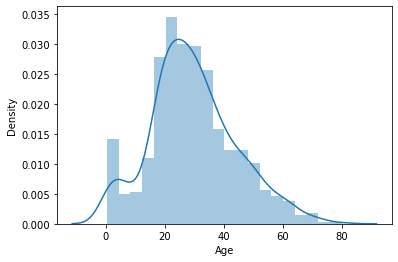

In [17]:
import warnings
print(df2["Age"].skew())
sns.distplot(df2["Age"])



In this case we can proceed to fill the missing values with Mean/Median while age is having null values

In [18]:
df2["Age"] = df2["Age"].fillna(df2["Age"].median())

In [27]:
df2.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    2
dtype: int64

In [19]:
df2

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S


**Handling NaN in 'Embarked'**

**we can use the Mode to fill in the missing values**

In [20]:
df2_embarked = df2["Embarked"].mode()
df2_embarked

0    S
Name: Embarked, dtype: object

In [33]:
df2["Embarked"] = df2["Embarked"].fillna("S")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [21]:
df2.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    2
dtype: int64

In [22]:
df2

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S


**We have handled all the missing values in the Dataset**

***5.Check and handle outliers in at least 3 columns in the dataset***

In [23]:
df2

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S


In [24]:
df2.nunique()

Survived      2
Pclass        3
Name        891
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Embarked      3
dtype: int64

In [25]:
df2.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


***5a. Checking for Outliers in Age Column***.

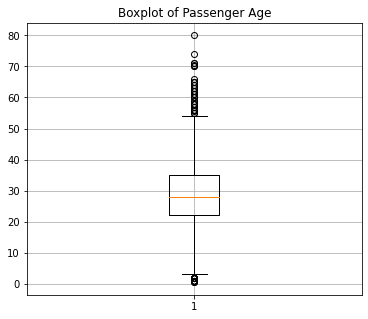

In [26]:
plt.figure(figsize=(6,5))
plt.boxplot(df2["Age"])
plt.title("Boxplot of Passenger Age")
plt.grid();

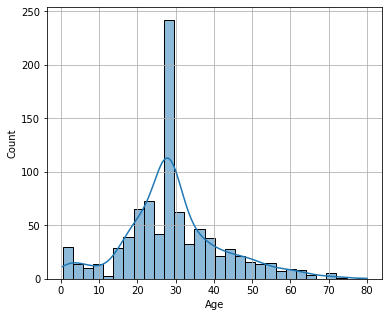

In [27]:
plt.figure(figsize = (6,5))
sns.histplot(data = df2, x= "Age",kde=True);
plt.grid()

In [28]:
df2["Age"].skew()

0.5102446555756495

In [29]:
Q1 = df2['Age'].quantile(0.25)
Q2 = df2['Age'].quantile(0.5)
Q3 = df2["Age"].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

print(f"Q1 = {Q1}, \nQ2 = {Q2},\nQ3 = {Q3}, \nIQR = {IQR}, \n\nLower limit = {lower_limit},\nUpper limit = {upper_limit}")

outlier = []
for x in df2["Age"]:
    if x < lower_limit or x > upper_limit:
        outlier.append(x)
        
index = df2[(df2["Age"] > upper_limit)|(df2["Age"] < lower_limit)].index
print(f"\n{index}")
df2.drop(index, inplace=True)
df2.describe()

Q1 = 22.0, 
Q2 = 28.0,
Q3 = 35.0, 
IQR = 13.0, 

Lower limit = 2.5,
Upper limit = 54.5

Int64Index([  8,  12,  16,  17,  34,  55,  79,  95,  97, 117, 120, 153, 165,
            171, 173, 175, 184, 196, 206, 233, 253, 269, 276, 281, 298, 306,
            327, 341, 367, 382, 387, 439, 457, 468, 470, 480, 484, 488, 493,
            494, 531, 546, 556, 571, 588, 626, 627, 631, 643, 645, 648, 660,
            673, 685, 695, 746, 756, 773, 789, 804, 825, 828, 830, 832, 852,
            880],
           dtype='int64', name='PassengerId')


,Survived,Pclass,Age,SibSp,Parch,Fare
count,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000
mean,0.380606,2.341818,28.515152,0.507879,0.357576,31.483615
std,0.485830,0.824096,10.177256,1.090670,0.798599,49.956429
min,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,13.416700
75%,1.000000,3.000000,34.000000,1.000000,0.000000,30.070800
max,1.000000,3.000000,54.000000,8.000000,6.000000,512.329200


**We have now cleared the outliers in the Age Feature**.

***5b. Handling the Outliers in SibSp column***

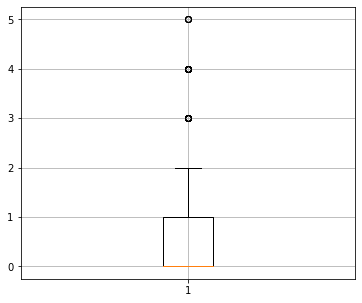

In [36]:
plt.figure(figsize=(6,5))
plt.boxplot(data=df2, x = "SibSp");

plt.grid();

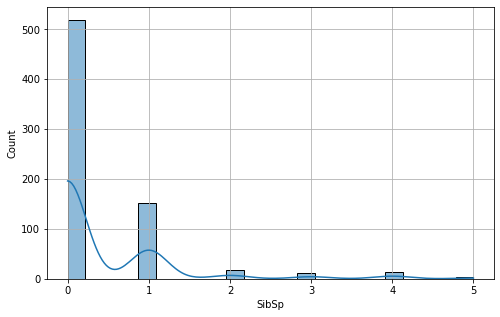

In [37]:
plt.figure(figsize = (8,5))
sns.histplot(data = df2, x= "SibSp",kde=True);
plt.grid()

In [56]:
Q1 = df2['SibSp'].quantile(0.25)
Q2 = df2['SibSp'].quantile(0.5)
Q3 = df2["SibSp"].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

print(f"Q1 = {Q1}, \nQ2 = {Q2},\nQ3 = {Q3}, \nIQR = {IQR}, \n\nLower limit = {lower_limit},\nUpper limit = {upper_limit}")

outlier = []
for x in df2["SibSp"]:
    if x < lower_limit or x > upper_limit:
        outlier.append(x)
        
index = df2[(df2["SibSp"] > upper_limit)|(df2["SibSp"] < lower_limit)].index
print(f"\n{index}")
df2.drop(index, inplace=True)
df2.describe()

Q1 = 0.0, 
Q2 = 0.0,
Q3 = 1.0, 
IQR = 1.0, 

Lower limit = -1.5,
Upper limit = 2.5

Int64Index([], dtype='int64', name='PassengerId')


,Survived,Pclass,Age,SibSp,Parch,Fare
count,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000
mean,0.390585,2.318066,29.114504,0.311705,0.296438,30.295599
std,0.488192,0.828231,9.814762,0.527743,0.757073,48.962228
min,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,23.125000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,13.000000
75%,1.000000,3.000000,34.000000,1.000000,0.000000,27.750000
max,1.000000,3.000000,54.000000,2.000000,6.000000,512.329200


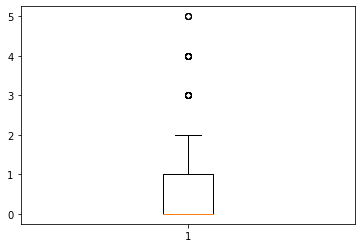

In [39]:
plt.boxplot(data=df2, x = "SibSp");

***5c. Handling the outliers in "Fare" feature :***

In [30]:
df2

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S


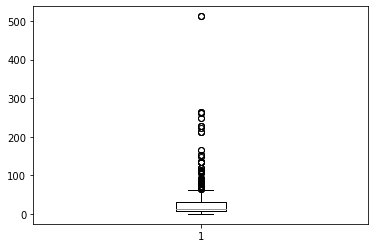

In [31]:
plt.boxplot(df2["Fare"]);

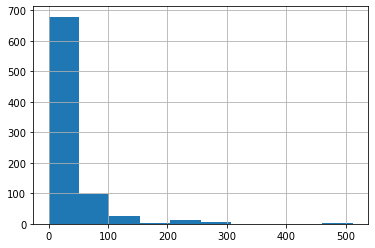

In [32]:
df2["Fare"].hist();

In [33]:
df2["Fare"].skew()

4.939703430470843

In [34]:
Q1 = df2['Fare'].quantile(0.25)
Q2 = df2['Fare'].quantile(0.5)
Q3 = df2["Fare"].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

print(f"Q1 = {Q1}, \nQ2 = {Q2},\nQ3 = {Q3}, \nIQR = {IQR}, \n\nLower limit = {lower_limit},\nUpper limit = {upper_limit}")

outlier = []
for x in df2["Fare"]:
    if x < lower_limit or x > upper_limit:
        outlier.append(x)

index = df2[(df2["Fare"] > upper_limit)|(df2["Fare"] < lower_limit)].index
print(index)
df2.drop(index, inplace=True)
df2.describe()

Q1 = 7.8958, 
Q2 = 13.4167,
Q3 = 30.0708, 
IQR = 22.174999999999997, 

Lower limit = -25.366699999999994,
Upper limit = 63.333299999999994
Int64Index([  2,  28,  32,  35,  53,  62,  63,  73,  89,  98,
            ...
            780, 790, 793, 803, 821, 836, 847, 850, 857, 864],
           dtype='int64', name='PassengerId', length=107)


,Survived,Pclass,Age,SibSp,Parch,Fare
count,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000
mean,0.334262,2.512535,28.079387,0.413649,0.317549,17.193204
std,0.472061,0.715818,10.012369,0.855001,0.784792,13.244507
min,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.889575
50%,0.000000,3.000000,28.000000,0.000000,0.000000,11.750000
75%,1.000000,3.000000,32.875000,1.000000,0.000000,25.928150
max,1.000000,3.000000,54.000000,5.000000,6.000000,61.379200


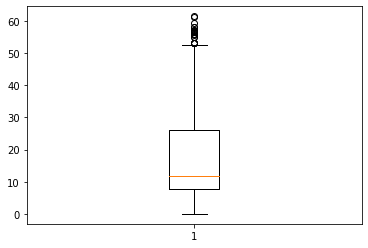

In [35]:
plt.boxplot(df2["Fare"]);

***6.Performing the min max scaling on the feature set (Take ‘Survived’ as target)***

In [40]:
df2.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q


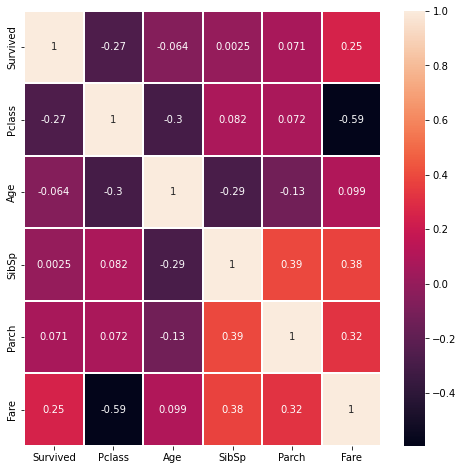

In [41]:
corr = df2.corr()
plt.figure(figsize = (8,8))
sns.heatmap(corr, annot=True,linewidths=0.2);

Catergorical column data is dropped

In [47]:
X = df2.drop(["Survived","Name","Sex","Ticket","Embarked"], axis=1)
X

,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,
1,3,22.0,1,0,7.2500
3,3,26.0,0,0,7.9250
4,1,35.0,1,0,53.1000
5,3,35.0,0,0,8.0500
6,3,28.0,0,0,8.4583
...,...,...,...,...,...
887,2,27.0,0,0,13.0000
888,1,19.0,0,0,30.0000
889,3,28.0,1,2,23.4500


In [48]:
minmax = MinMaxScaler(feature_range = (0,1))
X = minmax.fit_transform(X)
X = pd.DataFrame(X)
X.columns = ["Pclass","Age","SibSp","Parch","Fare"] # Giving the column their respective names
X

,Pclass,Age,SibSp,Parch,Fare
0,1.0,0.372549,0.2,0.000000,0.118118
1,1.0,0.450980,0.0,0.000000,0.129115
2,0.0,0.627451,0.2,0.000000,0.865114
3,1.0,0.627451,0.0,0.000000,0.131152
4,1.0,0.490196,0.0,0.000000,0.137804
...,...,...,...,...,...
713,0.5,0.470588,0.0,0.000000,0.211798
714,0.0,0.313725,0.0,0.000000,0.488765
715,1.0,0.490196,0.2,0.333333,0.382051
716,0.0,0.450980,0.0,0.000000,0.488765


In [49]:
X.describe()

,Pclass,Age,SibSp,Parch,Fare
count,718.000000,718.000000,718.00000,718.000000,718.000000
mean,0.756267,0.491753,0.08273,0.052925,0.280114
std,0.357909,0.196321,0.17100,0.130799,0.215782
min,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.500000,0.372549,0.00000,0.000000,0.128538
50%,1.000000,0.490196,0.00000,0.000000,0.191433
75%,1.000000,0.585784,0.20000,0.000000,0.422426
max,1.000000,1.000000,1.00000,1.000000,1.000000


Here, we have scaled all the relavent features including the AGE.